In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split



In [80]:
#SETUP authentication. Run this before anything


##############
#To do
client_id = "3e6ce8e4fade4a9199c6031f623338c4" # REPLACE THIS WITH YOUR OWN
client_secret = "adaa590a01f44864ac51f6aed29993df" #REPLACE WITH YOUR OWN
##############



SPOTIPY_CLIENT_ID = client_id
SPOTIPY_CLIENT_SECRET = client_secret

import os
os.environ["SPOTIPY_CLIENT_SECRET"] = client_secret
os.environ["SPOTIPY_CLIENT_ID"] = client_id
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost" #Add this to the URI redirect: SEE "https://community.spotify.com/t5/Spotify-for-Developers/Redirect-URI-needed/td-p/5067419"  and https://community.spotify.com/t5/Spotify-for-Developers/INVALID-CLIENT-Invalid-redirect-URI/td-p/5228936


In [81]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = client_id
secret = client_secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Modeling

In [82]:
#Read in data:
file_path = "data/andrew/andrew_last_2000_songs_features.csv"
df = pd.read_csv(file_path)
train, test = train_test_split(df, test_size=0.5)
train = train[["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]

columns = ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]
variances = []
data = []
for feature in train.columns:
    col = train[feature].tolist()
    data.append((feature,np.var(normalize([col],norm='l2'))))
    variances.append(np.var(normalize([col],norm='l2')))
    print(np.var(normalize([col],norm='l2')),feature+" variance")
print("Least varient feature:", columns[variances.index(min(variances))])
feature_choice = columns[variances.index(min(variances))]

6.370067035205557e-05 danceability variance
0.00014544211947118487 energy variance
0.00031845692207336043 key variance
0.00023986074963893813 loudness variance
0.00030900000000000003 mode variance
0.0005225661041406442 speechiness variance
0.00047355660966897506 acousticness variance
0.0008817427641011825 instrumentalness variance
0.0003867458541001271 liveness variance
0.000191471478745726 valence variance
5.842904661241524e-05 tempo variance
9.643390388355736e-05 duration_ms variance
Least varient feature: tempo


([<matplotlib.axis.YTick at 0x1a908bdc190>,
 [Text(0, 0, 'tempo'),
  Text(0, 1, 'danceability'),
  Text(0, 2, 'duration_ms'),
  Text(0, 3, 'energy'),
  Text(0, 4, 'valence'),
  Text(0, 5, 'loudness'),
  Text(0, 6, 'mode'),
  Text(0, 7, 'key'),
  Text(0, 8, 'liveness'),
  Text(0, 9, 'acousticness'),
  Text(0, 10, 'speechiness'),
  Text(0, 11, 'instrumentalness')])

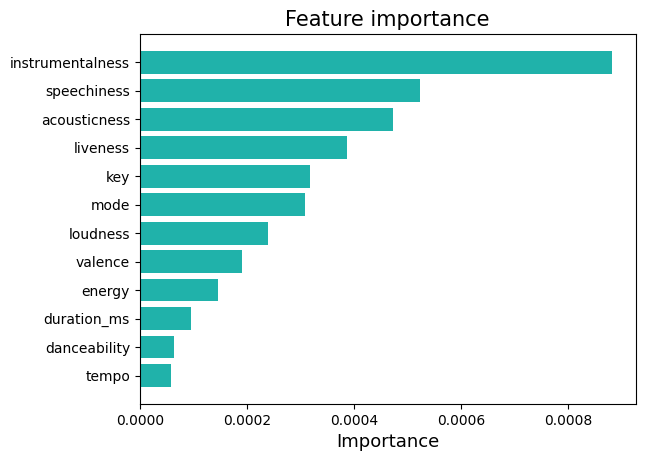

In [83]:
import matplotlib.pyplot as plt

unsorted_list = [(importance, feature) for feature, importance in 
                  zip(columns, variances)]
sorted_list = sorted(unsorted_list)

features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]
plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)

plt.barh(range(len(importance_sorted)), importance_sorted, color="lightseagreen")
plt.yticks(range(len(importance_sorted)), features_sorted)

In [84]:
num_songs = 20

#Get mean of feature:
mean = np.mean(train[feature_choice])
print(mean)

#iterate over each song in test:
test_search = test[["uri",feature_choice]]
dic = {}
scores = []
for song in test_search.values:
    dic[song[0]] = abs(mean-song[1]) #replaces the abs part with some sort of distance metric to deal with lists of means and lists of values. This is just a single distance for example
    scores.append(abs(mean-song[1]))
    # print(mean, song[1])
sort = np.sort(scores)
print(sort)
playlist= []
dist = [] 
for i in range(num_songs):
    val = sort[i]
    for key in dic:
        if dic[key] == val:
            print("Val", val)
            playlist.append(key)
            dist.append(val)

print("list of song ids",playlist)
song_list = []
for uri in playlist:
    track = str(uri)
    track = sp.track(track)
    song_list.append(track['name'])
print("\n") 
print("Playlist with song names:")
for song in song_list:
    print(song)


121.56382499999998
[ 0.177175  0.261825  0.274825  0.310825  0.368175  0.384175  0.409175
  0.430175  0.431175  0.447175  0.459175  0.461175  0.462175  0.497175
  0.562825  0.603825  1.016175  1.041825  1.086175  1.191825  1.218175
  1.243175  1.282175  1.296175  1.344825  1.397175  1.418825  1.423175
  1.428825  1.432175  1.459825  1.469175  1.469825  1.478175  1.486825
  1.487825  1.488825  1.522825  1.523825  1.524825  1.526825  1.537825
  1.540825  1.542825  1.545825  1.550825  1.551825  1.551825  1.564825
  1.571825  1.571825  1.578825  1.586825  1.594825  1.595825  1.602825
  1.606825  1.621825  1.623825  1.628825  1.645825  1.672825  1.690825
  1.691825  1.704825  1.707825  1.720825  1.726825  1.858825  1.931825
  2.301175  2.313825  2.314175  2.345175  2.357175  2.358175  2.367175
  2.373175  2.425175  2.434825  2.455175  2.459175  2.468175  2.496175
  2.508175  2.516175  2.542825  2.562825  2.571825  2.579825  2.596825
  2.660825  2.661825  2.717175  2.800825  2.829825  2.8491

([<matplotlib.axis.YTick at 0x1a905e69160>,
 [Text(0, 0, "You'll Be Back"),
  Text(0, 1, 'Around the World - Radio Edit [Radio Edit]'),
  Text(0, 2, 'New York State of Mind'),
  Text(0, 3, "Interdimensional Portal Leading to a Cute Place (with Snail's House)"),
  Text(0, 4, 'abcdefu'),
  Text(0, 5, 'Killing Me Softly With His Song'),
  Text(0, 6, 'All the Kids'),
  Text(0, 7, 'Relax, Take It Easy'),
  Text(0, 8, 'Sound Of Your Heart'),
  Text(0, 9, 'Heaven'),
  Text(0, 10, 'Waiting For You'),
  Text(0, 11, "Honey, I'm Good."),
  Text(0, 12, 'Make a New Dance Up'),
  Text(0, 13, 'Paradise'),
  Text(0, 14, 'Home'),
  Text(0, 15, 'Sonata in D Minor, Kk. 32 (Aria)'),
  Text(0, 16, "Haven't Met You Yet"),
  Text(0, 17, 'You Only Live Once'),
  Text(0, 18, 'Comeback (feat. Tory Lanez and 30 Roc)'),
  Text(0, 19, 'Girls Just Want to Have Fun')])

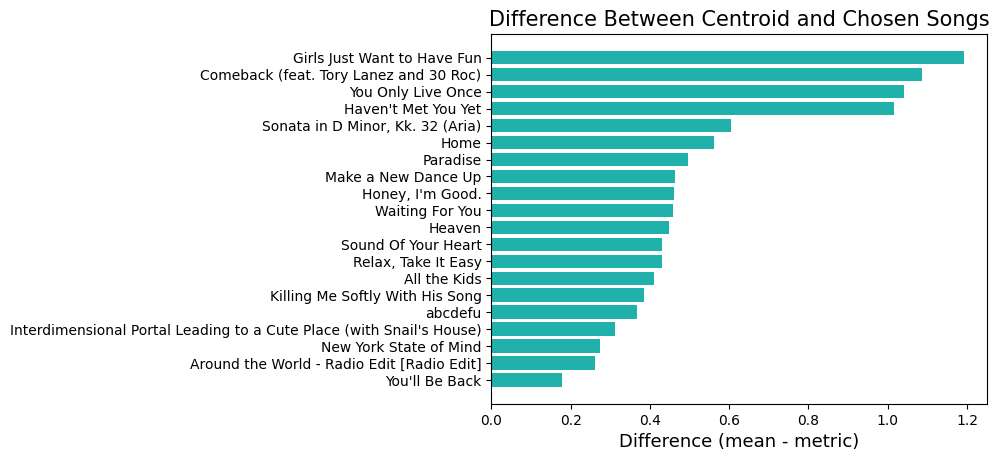

In [85]:
plt.title("Difference Between Centroid and Chosen Songs", fontsize=15)
plt.xlabel("Difference (mean - metric)", fontsize=13)
plt.barh(range(len(dist)), dist, color="lightseagreen")
plt.yticks(range(len(dist)), song_list)